<a href="https://colab.research.google.com/github/Mariejlo/Data-analytics-projects-/blob/main/Telemedicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REDI final project Telemedicine

In [1]:
#Environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Load data
df =pd.read_csv('/content/Readmissions_and_Deaths_-_Hospital.csv')

In [5]:
#Display first rows
df.head()

,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,0,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,13.9,12.6,15.6,NaN,07/01/2014,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,1,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,4.0,2.8,5.7,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,2,230118,HURON MEDICAL CENTER,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,9892699521,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,16.7,13.8,19.9,NaN,07/01/2012,06/30/2015,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."
3,3,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission for stroke patients,READM_30_STK,No Different than the National Rate,67,11.5,8.7,14.9,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
4,4,230133,OTSEGO MEMORIAL HOSPITAL,825 N CENTER AVE,GAYLORD,MI,49735,OTSEGO,9897312100,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,102,13.4,9.9,17.7,NaN,07/01/2012,06/30/2015,"825 N CENTER AVE\nGAYLORD, MI 49735\n(45.03537..."


In [6]:
#Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 64764 non-null  int64 
 1   Provider ID           64764 non-null  int64 
 2   Hospital Name         64764 non-null  object
 3   Address               64764 non-null  object
 4   City                  64764 non-null  object
 5   State                 64764 non-null  object
 6   ZIP Code              64764 non-null  int64 
 7   County Name           64582 non-null  object
 8   Phone Number          64764 non-null  int64 
 9   Measure Name          64764 non-null  object
 10  Measure ID            64764 non-null  object
 11  Compared to National  64764 non-null  object
 12  Denominator           64764 non-null  object
 13  Score                 64764 non-null  object
 14  Lower Estimate        64764 non-null  object
 15  Higher Estimate       64764 non-null

In [7]:
#Check for missing values
missing_values = df.isnull().sum()
missing_values

index                       0
Provider ID                 0
Hospital Name               0
Address                     0
City                        0
State                       0
ZIP Code                    0
County Name               182
Phone Number                0
Measure Name                0
Measure ID                  0
Compared to National        0
Denominator                 0
Score                       0
Lower Estimate              0
Higher Estimate             0
Footnote                41785
Measure Start Date          0
Measure End Date            0
Location                    0
dtype: int64

Handleling missing values to clean dataset

In [8]:
#Fill missing values with 'Unknown'
df['County Name'].fillna('Unknown', inplace=True)

In [9]:
#Missing values in Footnote, helps calculate % of missing values
footnote_missing_percentage = df['Footnote'].isnull().mean() * 100
print(f"Percentage of missing 'Footnote' values: {footnote_missing_percentage:.2f}%")

Percentage of missing 'Footnote' values: 64.52%


In [10]:
#Too many missing values therefore drop Footnote
if footnote_missing_percentage > 50:
    df.drop(columns=['Footnote'], inplace=True)

In [11]:
# Verify missing values handling
df.isnull().sum()

index                   0
Provider ID             0
Hospital Name           0
Address                 0
City                    0
State                   0
ZIP Code                0
County Name             0
Phone Number            0
Measure Name            0
Measure ID              0
Compared to National    0
Denominator             0
Score                   0
Lower Estimate          0
Higher Estimate         0
Measure Start Date      0
Measure End Date        0
Location                0
dtype: int64

Convert Non-Numerical Values

In [13]:
import numpy as np

# Replace 'Not Available' with NaN and convert columns to float to ensure consistency and allow operations
df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']] = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].replace('Not Available', np.nan).astype(float)

# Verify conversion
df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Denominator      41785 non-null  float64
 1   Score            41785 non-null  float64
 2   Lower Estimate   41785 non-null  float64
 3   Higher Estimate  41785 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


Descriptive statistics

In [14]:
# Calculate descriptive statistics
descriptive_stats = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].describe()
descriptive_stats


,Denominator,Score,Lower Estimate,Higher Estimate
count,41785.000000,41785.000000,41785.000000,41785.000000
mean,389.236688,14.512662,11.846143,17.728362
std,803.002904,4.953454,4.543540,5.431555
min,25.000000,1.400000,0.800000,2.200000
25%,77.000000,12.100000,9.300000,15.400000
50%,178.000000,15.200000,12.500000,18.000000
75%,387.000000,17.600000,14.900000,21.300000
max,26526.000000,31.300000,27.600000,35.300000


Visualise Data: histograms and Blox Plots

In [15]:
#Environment
import matplotlib.pyplot as plt
import seaborn as sns

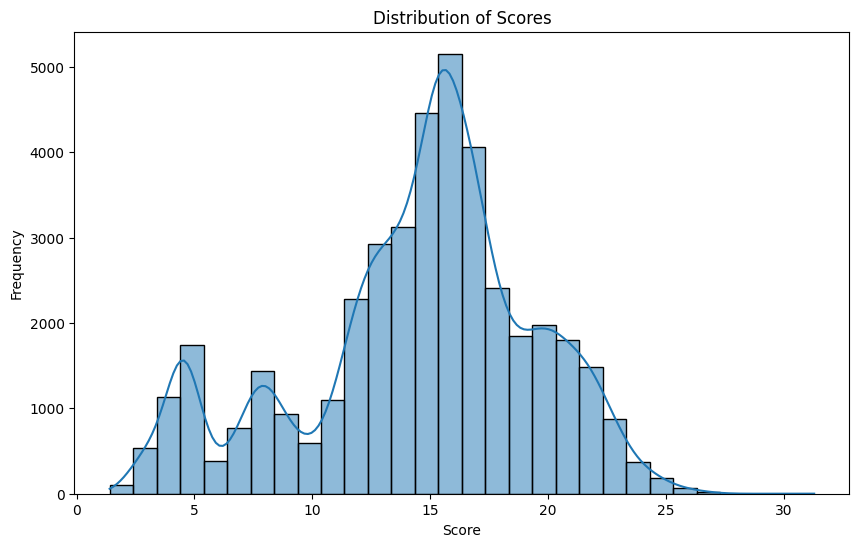

In [16]:
# Histogram of Scores good for frequency distribution of a single variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Interpretation of histogram:represents readmission rates in hospitals. right-skewed, peak around mean value 14.5. Multiple peaks probably other subgroups wihtin the data. Most scoreas are between 5 and 20, few outliers beyond 25

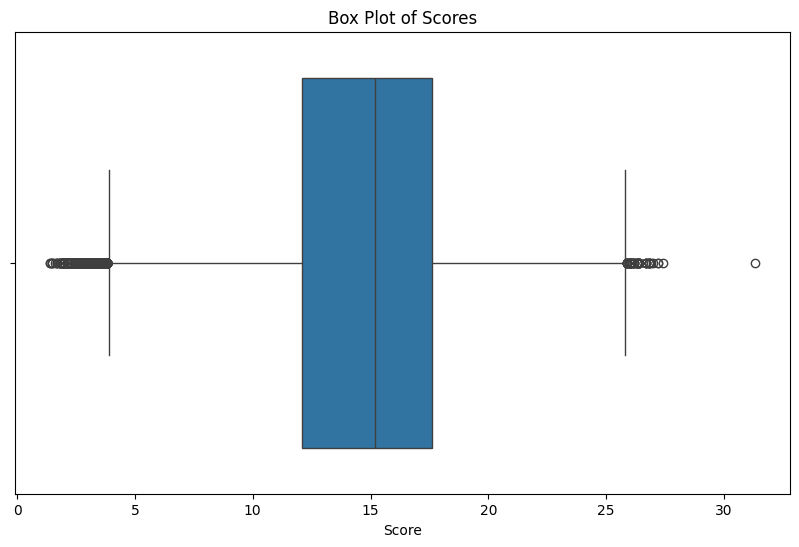

In [17]:
# Box Plot of Scores display distribution and identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Score'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

Interpretation Box Plot: it shows the spread of the score and highlights potential outliers.
Median score is around 15.2.
The IQE is between 12.1 and 17.6 , showing where the middle 50% of scores lie.
Outliers are present on both ends beyong the whiskers, which represents 1.5 times the IQR from the quartiles.

Descriptive Statistics Summary:

Count: There are 41,785 non-null entries for each column after cleaning.
Mean:
Denominator: 389.24 (average number of cases).
Score: 14.51 (average readmission rate).
Lower Estimate: 11.85 (average lower confidence interval for the score).
Higher Estimate: 17.73 (average higher confidence interval for the score).

Standard Deviation:
Denominator: 803.00 (high variability in the number of cases).
Score: 4.95 (moderate variability in readmission rates).
Lower Estimate: 4.54.
Higher Estimate: 5.43.

Quartiles:
Denominator: The middle 50% of data ranges from 77 to 387.
Score: The middle 50% of readmission rates range from 12.1 to 17.6.
Lower Estimate: Ranges from 9.3 to 14.9.
Higher Estimate: Ranges from 15.4 to 21.3.

Advanced Analysis

Scatter Plot of Scores vs Denominator
Objective: analyse relationship between Score and Denominator

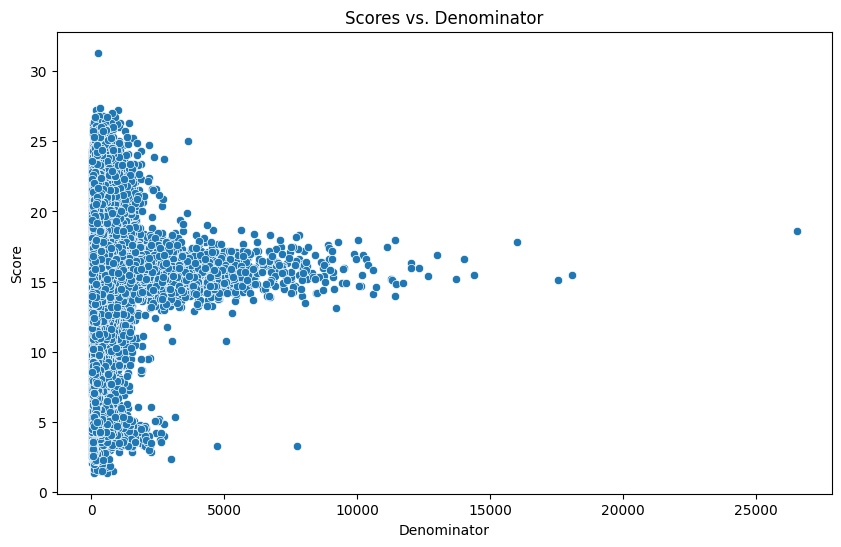

In [18]:
# Scatter Plot of Scores vs. Denominator
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Denominator'], y=df['Score'])
plt.title('Scores vs. Denominator')
plt.xlabel('Denominator')
plt.ylabel('Score')
plt.show()


**Interpretation of Scatter Plot of Scores vs Denominator:** it shows the relationship between the number of cases (Denominator) and the readmission scores.
**Insights:**
The majority of data points are clustered on the left side, indicating that most hospitals have a smaller number of cases.
There doesn't appear to be a strong correlation between the number of cases and the readmission score.
Some hospitals with a very high number of cases (> 5000) have varied readmission scores, indicating that size alone does not determine performance.

Box Plot of Scores by State
Objective: compare readmission scores across different states

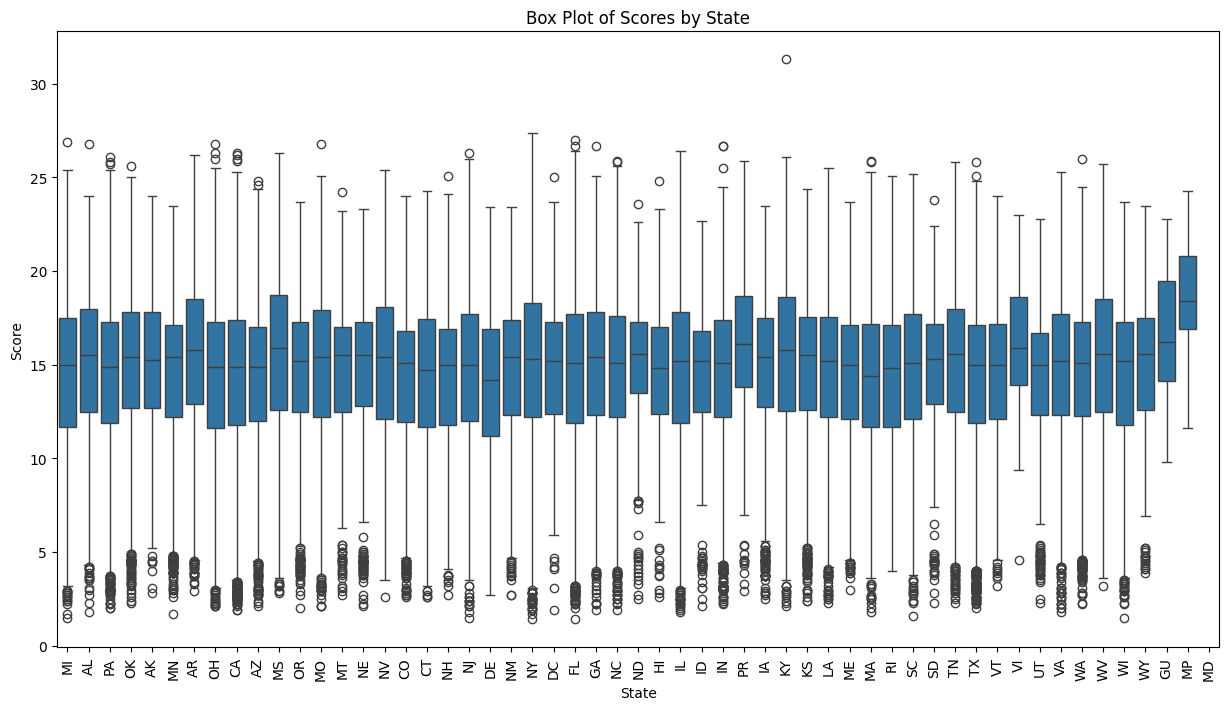

In [19]:
# Box Plot of Scores by State
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Score', data=df)
plt.title('Box Plot of Scores by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


**Box Plot of Scores by State:** it compares the distribution of readmission scores across different states.
**Insights:**
The median scores across states is consistent generally around 14-16.
Some states show a wider range of scores, indicating greater variability in hospital performance.
Outliers are present in nearly all states, suggesting that certain hospitals have significantly different readmission rates compared to others within the same state.

Correlation Analysis
Objective: identify correlations between numerical columns

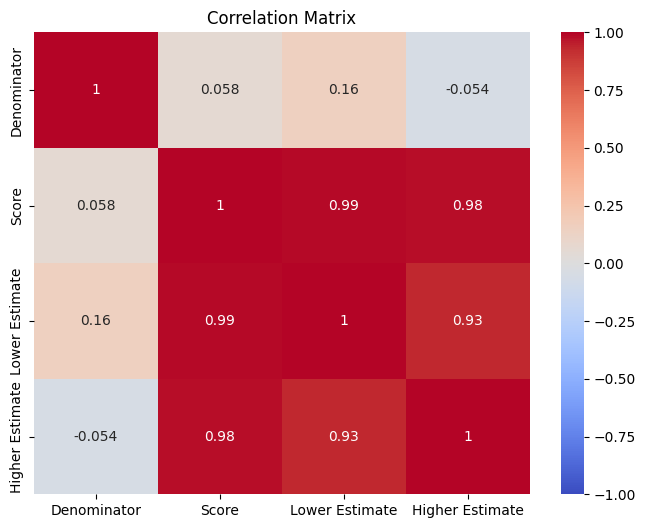

In [20]:
# Calculate correlation matrix
correlation_matrix = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Results interpretation
**Correlation Matrix:**The heatmap shows the correlation between different numerical variables.
**Insights:**
*Score, Lower Estimate, and Higher Estimate* are highly correlated with each other, as expected since they represent related metrics.
*Denominator* has a very weak correlation with Score, indicating that the number of cases does not strongly influence readmission scores.

Analysis of specific measures
Objective: identify which measures have higher readmission rates(e.g..type of treatments)

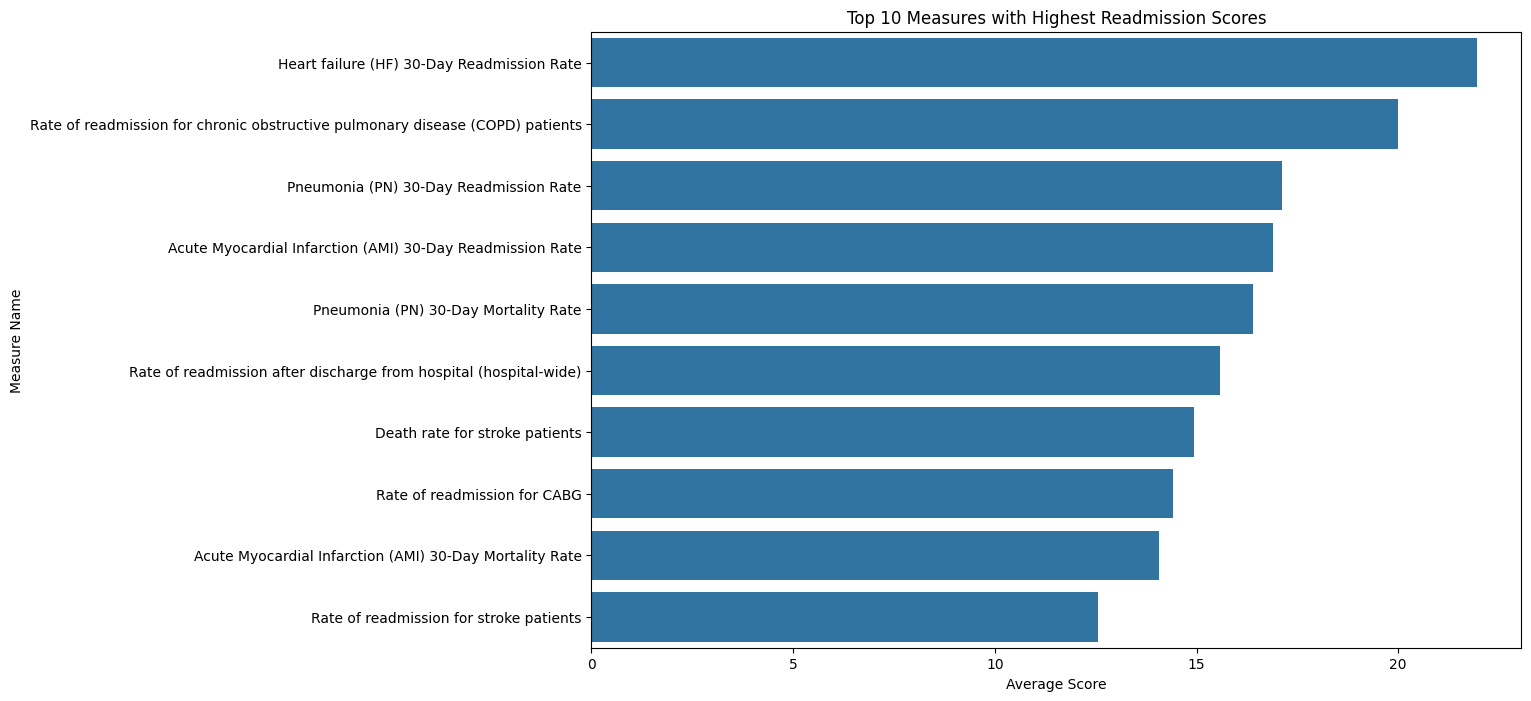

In [22]:
# Group by Measure Name and calculate mean score
measure_scores = df.groupby('Measure Name')['Score'].mean().sort_values(ascending=False)

# Plot the top 10 measures with the highest scores
plt.figure(figsize=(12, 8))
sns.barplot(x=measure_scores.head(10), y=measure_scores.head(10).index)
plt.title('Top 10 Measures with Highest Readmission Scores')
plt.xlabel('Average Score')
plt.ylabel('Measure Name')
plt.show()

**Analysis of Specific Measures:** This bar plot shows the top 10 measures with the highest average readmission scores.
**Insights:**
*Heart failure* (HF) 30-Day Readmission Rate has the highest average readmission score.
Measures related to chronic obstructive pulmonary disease (COPD), pneumonia, acute myocardial infarction (AMI), and stroke are also among the highest.
These findings suggest that certain conditions and treatments are associated with higher readmission rates, which could be targeted for quality improvement initiatives.

Scatter Plot vs Denominator
Objective: To explore if there is any relationship between the number of cases (Denominator) and the readmission scores. It can help in identifying if larger hospitals (with more cases) have different readmission rates comoared to smaller hospitals

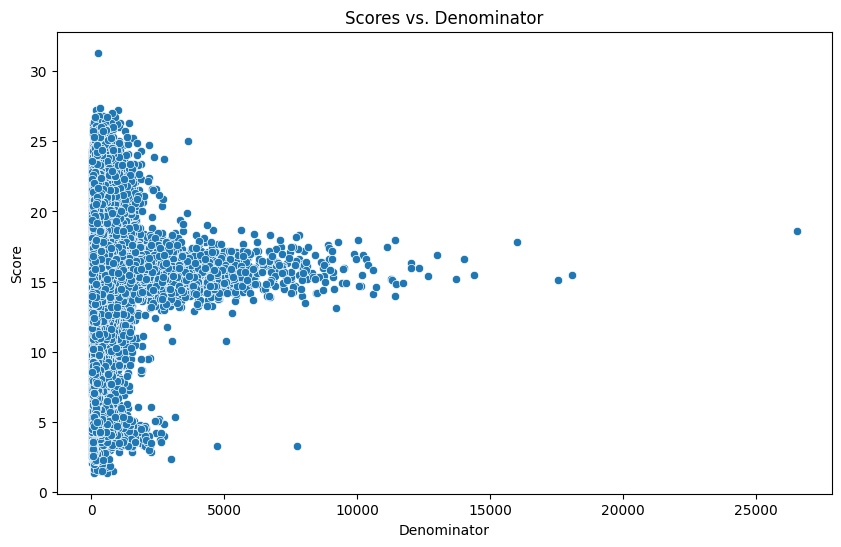

In [23]:
# Scatter Plot of Scores vs. Denominator
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Denominator'], y=df['Score'])
plt.title('Scores vs. Denominator')
plt.xlabel('Denominator')
plt.ylabel('Score')
plt.show()

Blox Plot of Scores by State
Objective: To compare readmission scores across different states.
 Geographic analysis can reveal regional differences in healthcare quality and outcomes, potentially indicating areas that need improvement.

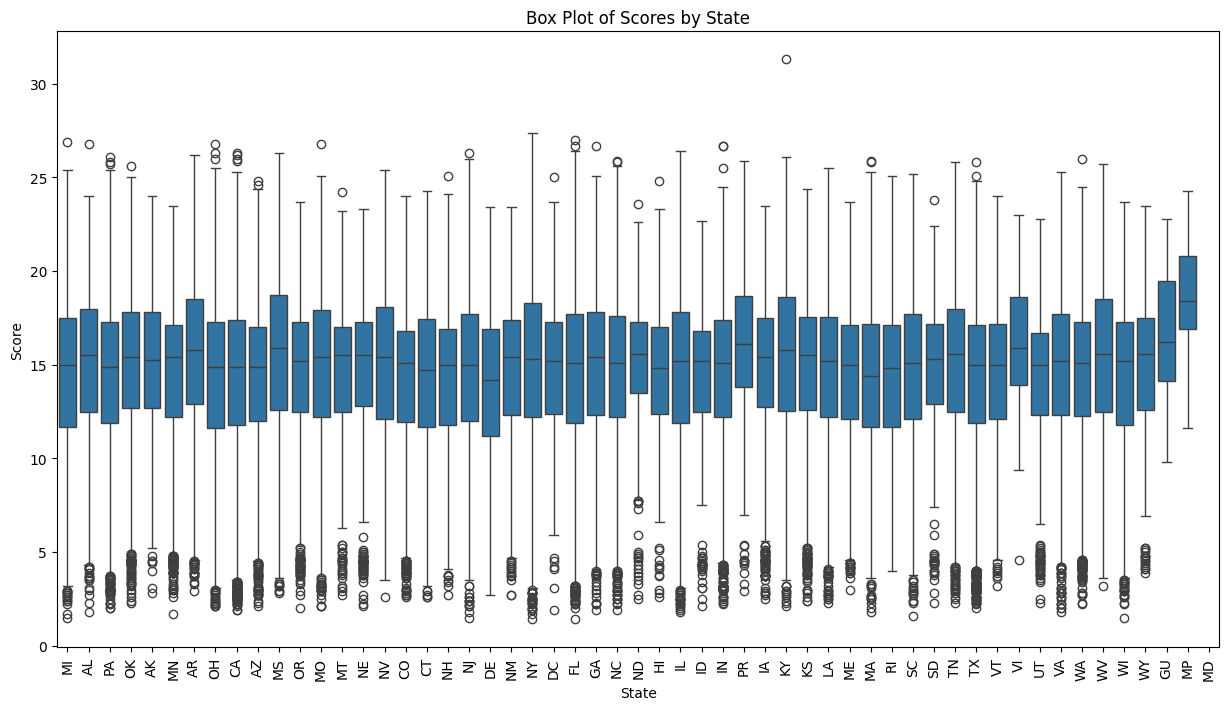

In [24]:
# Box Plot of Scores by State
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Score', data=df)
plt.title('Box Plot of Scores by State')
plt.xlabel('State')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


Correlation Analysis:
Objective: To identify how different numerical variables relate to each other. Correlation analysis helps in understanding which factors might influence readmission rates and can guide further in-depth analysis.

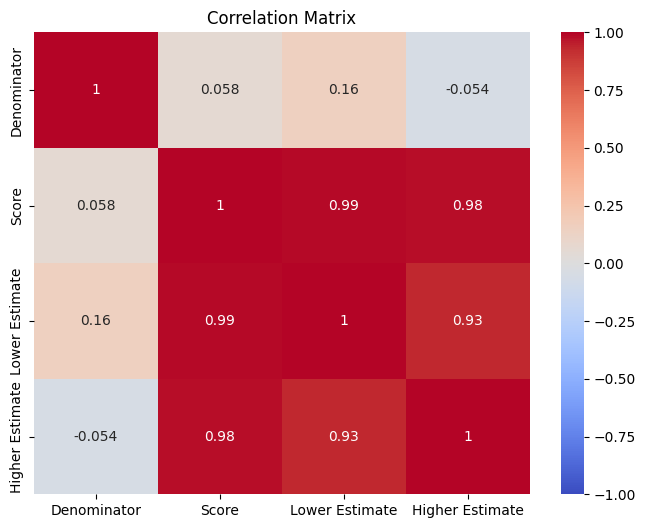

In [25]:
# Calculate correlation matrix
correlation_matrix = df[['Denominator', 'Score', 'Lower Estimate', 'Higher Estimate']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Analysis of Specific Measures:
Objective: To identify which specific measures (types of treatments or conditions) have the highest readmission scores.
Highlighting high-risk measures can help in targeting specific areas for quality improvement initiatives in healthcare.

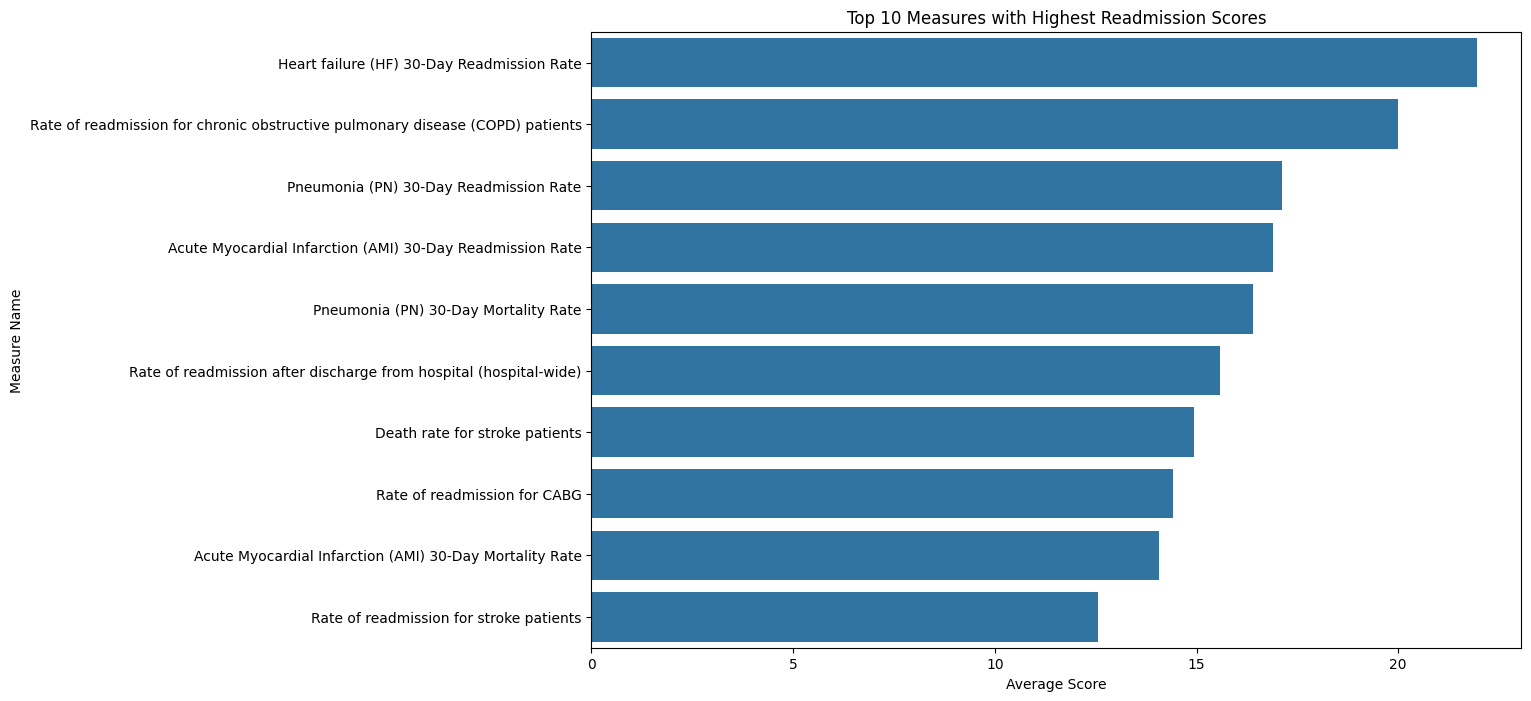

In [26]:
# Group by Measure Name and calculate mean score
measure_scores = df.groupby('Measure Name')['Score'].mean().sort_values(ascending=False)

# Plot the top 10 measures with the highest scores
plt.figure(figsize=(12, 8))
sns.barplot(x=measure_scores.head(10), y=measure_scores.head(10).index)
plt.title('Top 10 Measures with Highest Readmission Scores')
plt.xlabel('Average Score')
plt.ylabel('Measure Name')
plt.show()
